# Product Range Analysis - Denis Haicov

As a data analyst of a online website store I got a mission aproaching the product rangle analysis. The main task is:

Analysing and identifying top-selling products and the less selling products to understand the profitability of our company.

In my analysis I am going to:

1. Prepare the data - Upload and check the data for missing values, duplicates and outliers, change data types(if needed).
2. EDA (Exploratory Data Analysis) - Group data by the necessary columns to approach to our data from different views and understand it better, discover our top customers and products and create graphs to show it better visually and study our most profitable months.
3. Run test hypothesis on our data, our hypothesis are:
- Month 12(December) will be most profitable because of the holidays.
- Our most profitable items are the items that are most sold in quantity.
4. Make conclusions on my finding regarding our products.

## Preparing the data

In [1]:
import pandas as pd
import statistics
import numpy as np
import datetime as dt
from datetime import datetime
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pandas.plotting import scatter_matrix



In [2]:
df = pd.read_csv('C:/Users/User/Desktop/Practicum/Final/dataset.csv', sep='\t')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,11/29/2018 08:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,11/29/2018 08:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,11/29/2018 08:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,11/29/2018 08:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,11/29/2018 08:34,1.69,13047.0


In [4]:
df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 157.9 MB


We can notice here a couple of things:
- There are missing values in 2 columns(Description and CustomerID)
- We should change the Dtype for some of the columns, expicially the InvoiceDate
- I would like to rename the columns to remove capital letter
- I hope that we will manage to downsize the memory usage of this data.

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We can notice here that we have almost 542k transactions. Also, we have negative values that we should check on them and adress it.

In [6]:
df = df.rename(columns = {'InvoiceNo': 'invoice_num', 'StockCode': 'stock_code', 'Description': 'product', 'Quantity': 'quantity', 'InvoiceDate': 'date', 'UnitPrice': 'price', 'CustomerID': 'id'})

I changed the names of the columns for easier work.

In [7]:
df.head()

,invoice_num,stock_code,product,quantity,date,price,id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [8]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y %H:%M")

In [9]:
df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice_num  541909 non-null  object        
 1   stock_code   541909 non-null  object        
 2   product      540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   date         541909 non-null  datetime64[ns]
 5   price        541909 non-null  float64       
 6   id           406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 124.3 MB


We can see that we have decreased our memory usage a little.

In [10]:
df.isnull().sum()/len(df)*100

invoice_num     0.000000
stock_code      0.000000
product         0.268311
quantity        0.000000
date            0.000000
price           0.000000
id             24.926694
dtype: float64

As we can see, we have 2.6% missing values in "product" column and almost 25% in the "id" column. I think we can get rid of the data about the 2.6% missing values, wont affect much our data. But lets check it before we do any decisions.

In [11]:
df['product'].isnull().value_counts()

False    540455
True       1454
Name: product, dtype: int64

In [12]:
df[df['product'].isna()].head()

,invoice_num,stock_code,product,quantity,date,price,id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN


In [13]:
df[df['id'].isna()].head(20)

,invoice_num,stock_code,product,quantity,date,price,id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
1447,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,NaN
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2018-11-29 14:32:00,2.51,NaN
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2018-11-29 14:32:00,0.43,NaN
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2018-11-29 14:32:00,0.43,NaN
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2018-11-29 14:32:00,0.43,NaN


In [14]:
df = df.dropna(subset=['product'])

In [15]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice_num  540455 non-null  object        
 1   stock_code   540455 non-null  object        
 2   product      540455 non-null  object        
 3   quantity     540455 non-null  int64         
 4   date         540455 non-null  datetime64[ns]
 5   price        540455 non-null  float64       
 6   id           406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 128.2 MB


In [16]:
df.duplicated().sum()

5268

We can see that we have some duplicates, but its less then 1% of our data so we can remove it also.

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [19]:
df['invoice_num'].value_counts().reset_index()

,index,invoice_num
0,573585,1114
1,581219,749
2,581492,731
3,580729,721
4,558475,705
...,...,...
24441,C551348,1
24442,C551386,1
24443,C572187,1
24444,C551388,1


Notice that we have transaction with a C letter before it. I guess its the orders that were cancelled as we saw negative values on it before so lets create a data speacially for it and check it further.

In [20]:
cancelled = df[df.invoice_num.apply(lambda x: x.startswith('C'))]

In [21]:
cancelled.head()

,invoice_num,stock_code,product,quantity,date,price,id
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0


In [22]:
df['id'] = df['id'].astype('str')

I decided to change the ID column to "str". In the future it would be necessary to make some graph on our data.

In [23]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice_num  535187 non-null  object        
 1   stock_code   535187 non-null  object        
 2   product      535187 non-null  object        
 3   quantity     535187 non-null  int64         
 4   date         535187 non-null  datetime64[ns]
 5   price        535187 non-null  float64       
 6   id           535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 155.0 MB


Lets see our data and its outliers in a boxplot

In [24]:
df['price'].min()

-11062.06

In [25]:
df['price'].max()

38970.0

In [26]:
Q1_price = df['price'].quantile(0.25)

In [27]:
Q3_price = df['price'].quantile(0.75)

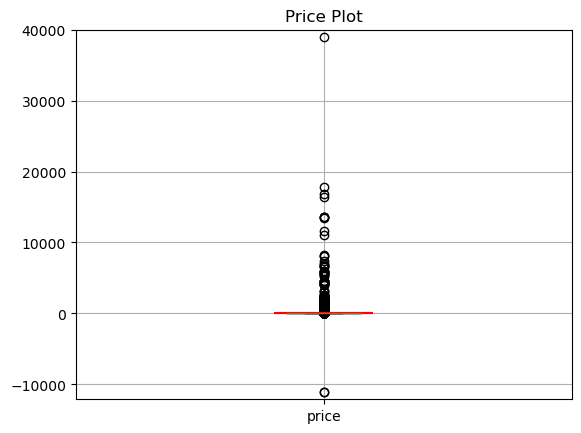

In [28]:
df.boxplot('price')
plt.ylim(-12100, 40000)
plt.hlines(y=[Q1_price,Q3_price], xmin=0.9, xmax=1.1, color="red")
plt.title('Price Plot')
plt.show()

In [29]:
df['quantity'].min()

-80995

In [30]:
df['quantity'].max()

80995

In [31]:
Q1_quantity = df['quantity'].quantile(0.25)

In [32]:
Q3_quantity = df['quantity'].quantile(0.75)

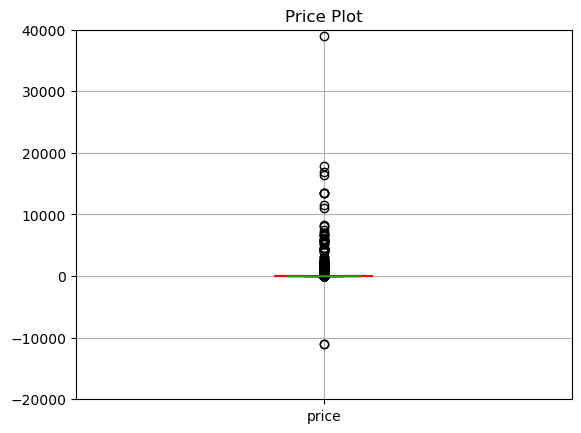

In [33]:
df.boxplot('price')
plt.ylim(-20000, 40000)
plt.hlines(y=[Q1_quantity,Q3_quantity], xmin=0.9, xmax=1.1, color="red")
plt.title('Price Plot')
plt.show()

In [34]:
outliers_price = df.query('@Q1_price > price | price > @Q3_price')

In [35]:
outliers_price.head()

,invoice_num,stock_code,product,quantity,date,price,id
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2018-11-29 08:26:00,4.25,17850.0
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,2018-11-29 08:34:00,4.25,13047.0
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2018-11-29 08:34:00,4.95,13047.0
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2018-11-29 08:34:00,9.95,13047.0


In [36]:
print((outliers_price.shape[0] / df['price'].shape[0])*100)

45.25520986122608


In [37]:
outliers_quantity = df.query('@Q1_quantity > quantity | quantity > @Q3_quantity')

In [38]:
outliers_quantity.head()

,invoice_num,stock_code,product,quantity,date,price,id
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2018-11-29 08:34:00,1.69,13047.0
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2018-11-29 08:45:00,3.75,12583.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2018-11-29 08:45:00,3.75,12583.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2018-11-29 08:45:00,3.75,12583.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2018-11-29 08:45:00,0.85,12583.0


In [39]:
print((outliers_quantity.shape[0] / df['quantity'].shape[0])*100)

26.493543378295808


We can see that we have alot of outliers that are very far from our mean. We cant really remove them because they are still transactions and we need to adress them too.

In [40]:
df['sales'] = df['quantity'] * df['price']

In [41]:
df.head()

,invoice_num,stock_code,product,quantity,date,price,id,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34


Lets return to our data witht he cancellation and check our product that were cancelled mostly.

In [42]:
df_cancelled = df[df.invoice_num.apply(lambda x: x.startswith('C'))]


In [43]:
df_cancelled.head()

,invoice_num,stock_code,product,quantity,date,price,id,sales
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,-6.96


In [44]:
df_cancelled.describe()

,quantity,price,sales
count,9251.000000,9251.000000,9251.000000
mean,-29.787050,48.570430,-96.636010
std,1147.997592,667.926393,2043.923629
min,-80995.000000,0.010000,-168469.600000
25%,-6.000000,1.450000,-17.700000
50%,-2.000000,2.950000,-8.500000
75%,-1.000000,5.950000,-3.700000
max,-1.000000,38970.000000,-0.120000


In [45]:
sorted_cancelled_products = df_cancelled.groupby(['stock_code', 'product'], as_index = False).sum().sort_values(by='quantity')

In [46]:
sorted_cancelled_products

,stock_code,product,quantity,price,sales
1529,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,-168469.60
1270,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74494,11.66,-77479.64
1688,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376,7.68,-321.60
1972,M,Manual,-4066,140342.18,-146784.46
133,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150,4.99,-6591.42
...,...,...,...,...,...
1197,23066,SMALL DECO JEWELLERY STAND,-1,8.25,-8.25
1699,84508A,CAMOUFLAGE DESIGN TEDDY,-1,2.55,-2.55
1432,23370,SET 36 COLOURING PENCILS DOILY,-1,1.25,-1.25
1196,23065,LARGE DECO JEWELLERY STAND,-1,12.50,-12.50


In [130]:
fig = px.bar(sorted_cancelled_products.head(10), x='product', y='quantity', title='Top 10 Returned Products by Customers')
fig.show()

We can see that we have 2 outliers that were returned alot:
- Paper Craft, Little Birdie
- Medium Ceramic Top Storage Jar

In [48]:
df_filtered = df.drop(df.index[df['quantity'] < 0])

I have created a data that is filtered only with the data about the purchases, without the cancellations so it would be easier to work with.

In [49]:
df_filtered.describe()

,quantity,price,sales
count,525462.000000,525462.000000,525462.000000
mean,10.681024,3.876109,20.210761
std,157.399272,42.040021,272.402776
min,1.000000,-11062.060000,-11062.060000
25%,1.000000,1.250000,3.900000
50%,4.000000,2.080000,9.920000
75%,11.000000,4.130000,17.700000
max,80995.000000,13541.330000,168469.600000


Notice that our maximum value of buying is the same as cancelling, lets check them seperatley.

In [50]:
df_filtered.loc[(df_filtered['stock_code'] == '23843')]

,invoice_num,stock_code,product,quantity,date,price,id,sales
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0,168469.6


In [51]:
df_cancelled.loc[(df_cancelled['stock_code'] == '23843')]

,invoice_num,stock_code,product,quantity,date,price,id,sales
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446.0,-168469.6


Yes, this is indeed an outlier, a purchase of a big quantity of a product that returned almost immidiatley(after 12 mins). I guess it was bought by mistake.

## Exploratoty Data Anaslysis

### Creating and Grouping data by date and sales for easier tracking.

Lets firstly create a column with 'month' in it.

In [52]:
df_filtered['month'] = df_filtered['date'].dt.month

In [53]:
df_filtered.head()

,invoice_num,stock_code,product,quantity,date,price,id,sales,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30,11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.00,11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11


In [54]:
sales_by_month = df_filtered.groupby('month').sum().sort_values(by='quantity').reset_index()

In [55]:
sales_by_month

,month,quantity,price,sales
0,2,278270,105953.090,517384.770
1,4,294773,111938.671,518360.961
2,6,374949,130376.970,720793.540
3,3,377868,139768.760,696766.280
4,1,412886,140269.630,739987.020
5,5,418836,161038.580,815724.180
6,7,423649,148364.041,752378.101
7,8,441326,120472.500,767367.970
8,9,533347,163661.562,988381.852
9,12,559713,260390.190,1243291.740


In [56]:
months = range(1, 13)

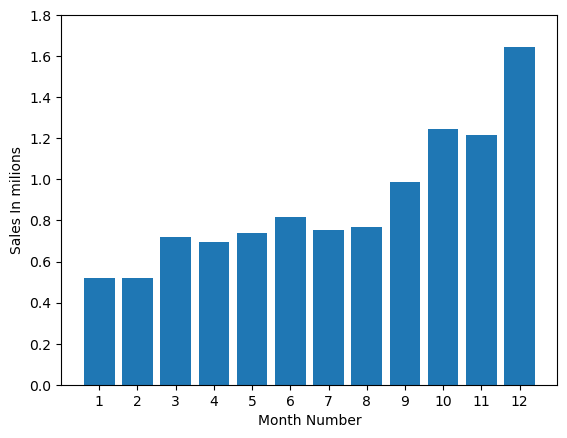

In [57]:
plt.bar(months, sales_by_month['sales'])
plt.xticks(months)
labels, lovation = plt.yticks()
plt.yticks(labels, (labels/1000000))
plt.xlabel('Month Number')
plt.ylabel('Sales In milions')
plt.show()

As we can see, I potted a bar graph for months and month 12(December) is the most profitable. Mostly because of the holidays that people buy presents to themselfs and each other.

In [58]:
quant_by_month = df_filtered.groupby('month')['quantity'].count().reset_index()

In [59]:
quant_by_month.head()

,month,quantity
0,1,36969
1,2,26275
2,3,34508
3,4,28134
4,5,38509


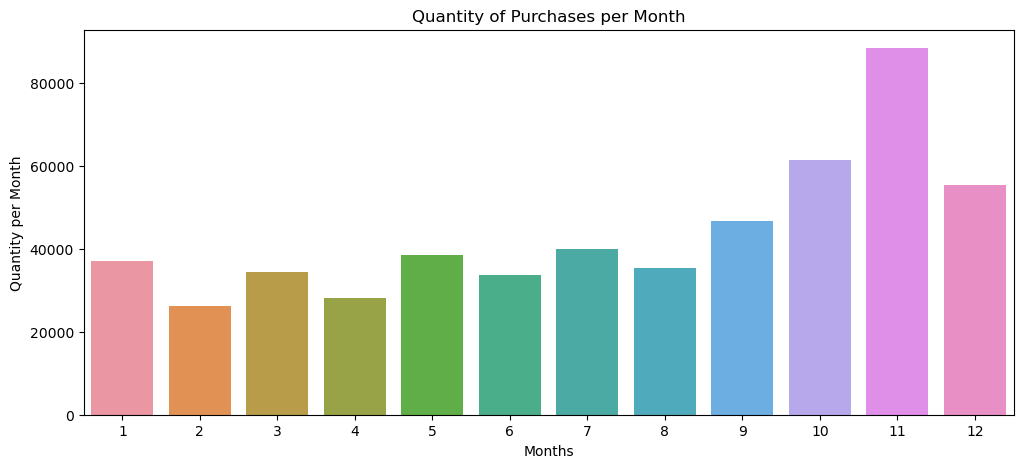

In [60]:
plt.figure(figsize=(12,5))
sns.barplot(data = quant_by_month, x='month', y='quantity')
plt.xlabel('Months')
plt.ylabel('Quantity per Month')
plt.title('Quantity of Purchases per Month')
plt.show()

Interesting, our month with the most purchases in quantity is month 11(November) even though December was most profitable. I guess that people try to prepare before the Chrismass and know that delivery takes time.

### Discovering our top customers that buys the most products/invest money in our products.

In [61]:
revenue_cust = df_filtered.groupby('id')['price'].sum().reset_index().sort_values(by='price', ascending=False)

In [62]:
revenue_cust.head()

,id,price
4339,nan,809226.54
1290,14096.0,33332.45
1880,14911.0,26150.35
4011,17841.0,19471.68
324,12744.0,12949.99


In [63]:
revenue_cust = revenue_cust[revenue_cust['id'] != 'nan']

In [64]:
fig = px.bar(revenue_cust.head(10), x='id', y='price', title='Top 10 Customers who invest the most money')
fig.show()

Our customer that invested the most money in our online store is ID 14096 with 33k. After him comes another customer (ID 14911) with 26k but the customers keep lowering drastically, with our top 10 customer at 5k (6 times lower then the first).

### Studying our top and least selling products.

In [65]:
df_filtered.head()

,invoice_num,stock_code,product,quantity,date,price,id,sales,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30,11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.00,11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11


In [66]:
grouped_product = df_filtered.groupby('product')

In [67]:
grouped_product = grouped_product.sum()['quantity'].reset_index().sort_values(by='quantity', ascending=False)

In [129]:
fig = px.bar(grouped_product.head(10), x='product', y='quantity', title='Top 10 Selling Product')
fig.show()

Our top selling product is the Paper Craft, Little Birdie with almost 81k in quantity and after him comes the Medium Ceramic Top STorage Jar product with 78k in quantity. But as we already know, those products were returned afterwards.

In [69]:
least_selling_products = grouped_product.query('quantity < 2')

In [131]:
least_selling_products

,product,quantity
3060,SET 10 CARDS SNOWY ROBIN 17099,1
1420,GARDENERS KNEELING PAD,1
1108,EASTER CRAFT IVY WREATH WITH CHICK,1
2510,PINK BERTIE MOBILE PHONE CHARM,1
1097,Dotcomgiftshop Gift Voucher £100.00,1
...,...,...
619,CAMOUFLAGE DOG COLLAR,1
2549,PINK FEATHER CHRISTMAS DECORATION,1
605,CAKE STAND LACE WHITE,1
1985,LILY BROOCH WHITE/SILVER COLOUR,1


In [71]:
least_selling_products['product'].value_counts().sum()

69

We have 69 products that were bought only once. We should watch them closley and understand why is it the case and why they dont affect much our store.

## Test Hypothesis

### First hypothesis:

Is there a time in the year that we have more profitability?

My hypothesis is - That during the end of the year, on month 12(December) we would have the most profitability.

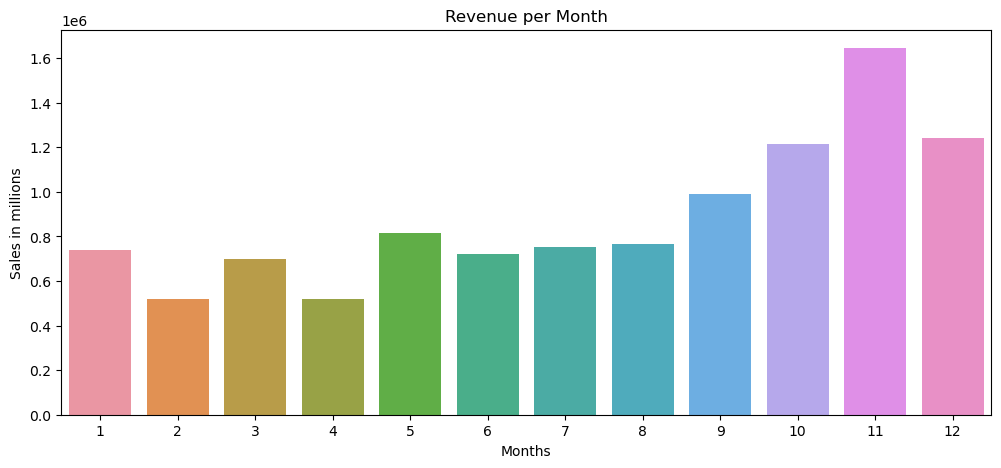

In [72]:
plt.figure(figsize=(12,5))
sns.barplot(data = sales_by_month, x='month', y='sales')
plt.xlabel('Months')
plt.ylabel('Sales in millions')
plt.title('Revenue per Month')
plt.show()

In [73]:
avg_buy_per_month = df_filtered.groupby(['month'])['sales'].mean().reset_index()

In [74]:
avg_buy_per_month

,month,sales
0,1,20.016420
1,2,19.691143
2,3,20.191442
3,4,18.424716
4,5,21.182689
5,6,21.349255
6,7,18.826867
7,8,21.617217
8,9,21.201721
9,10,19.761050


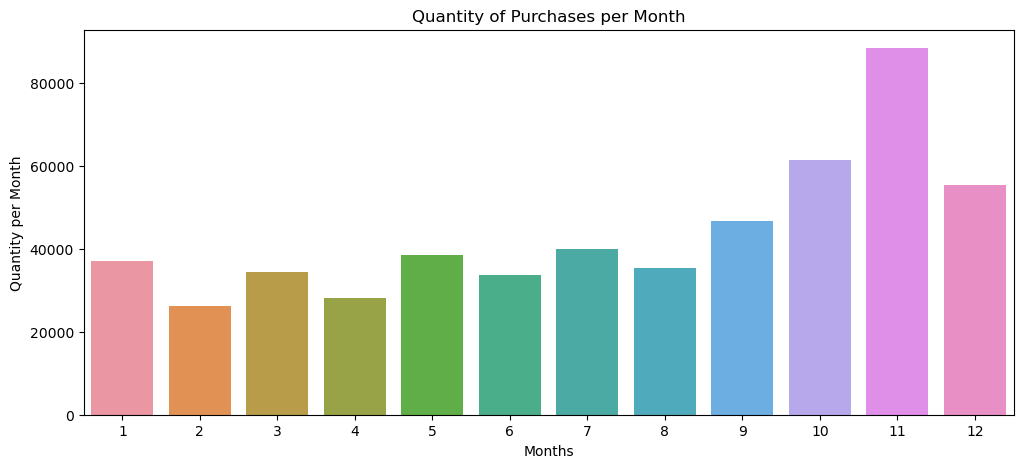

In [75]:
plt.figure(figsize=(12,5))
sns.barplot(data = quant_by_month, x='month', y='quantity')
plt.xlabel('Months')
plt.ylabel('Quantity per Month')
plt.title('Quantity of Purchases per Month')
plt.show()

My hypothesis was denied. We can notice that the most profitable month for us was month 11(November) with over 1.6M in sales.
After it comes month 12(December) and month 10(October) with almost the same revenue, around 1.2M.
I guess the reason is that people were preparing for christmass and buying gifts but they now that delivery takes time so decided to buy a month before the holidays.
But when we check the average buy per month, we can notice that month 12 is slightly with an adventage over the other months.
ALso, quantity of orders is leading by far on month 11, November, with a big advantage over the month 12(December).

### Second hypothesis:

Is there a time in the day that people consider purchasing ?

My hypothesis is - People consider buying in the afternoon after they come from work. 

In [76]:
df_filtered['hour'] = df_filtered['date'].dt.hour

In [77]:
df_filtered.head()

,invoice_num,stock_code,product,quantity,date,price,id,sales,month,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30,11,8
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.00,11,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11,8


In [102]:
hour_of_day = df_filtered.groupby('hour')['invoice_num'].count().reset_index()

In [103]:
hour_of_day

,hour,invoice_num
0,6,1
1,7,379
2,8,8801
3,9,33701
4,10,47616
5,11,55544
6,12,76015
7,13,70023
8,14,65300
9,15,75739


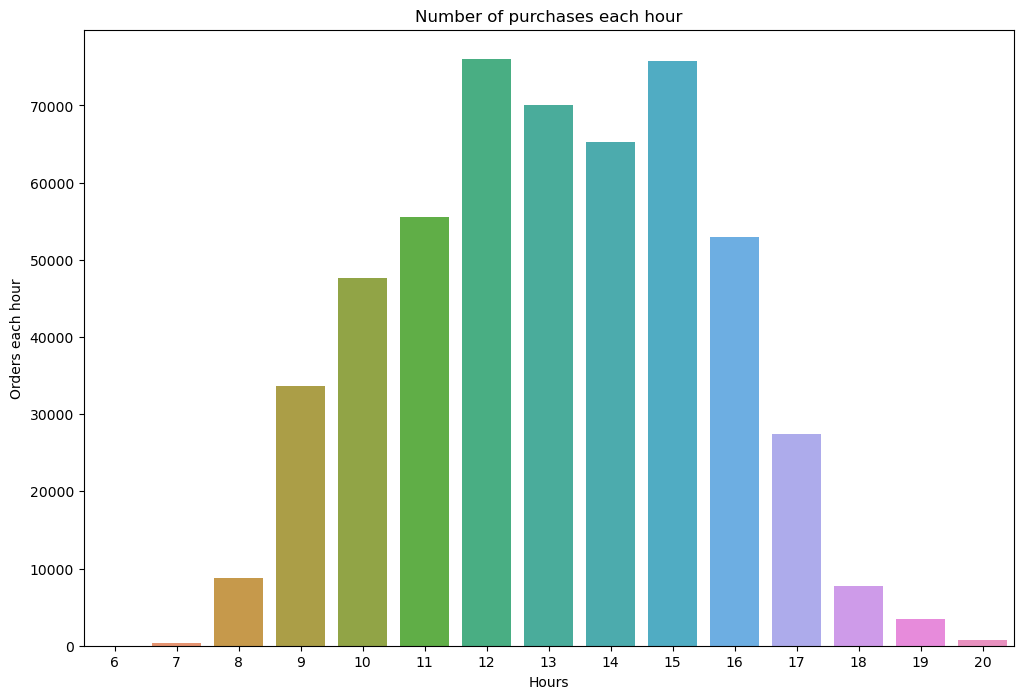

In [104]:
plt.figure(figsize=(12,8))
sns.barplot(data = hour_of_day, x = 'hour', y = 'invoice_num')
plt.ylabel('Orders each hour')
plt.xlabel('Hours')
plt.title('Number of purchases each hour')
plt.show()

In [123]:
def x(hour):
    if (hour > 6) and (hour < 12):
        return 'Morning'
    elif (hour >= 12) and (hour < 17):
        return 'Noon'
    elif (hour >= 17) and (hour <= 20):
        return 'Afternoon'

In [124]:
df_filtered['session'] = df_filtered['hour'].apply(x)

In [125]:
df_filtered

,invoice_num,stock_code,product,quantity,date,price,id,sales,month,hour,session
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30,11,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.00,11,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34,11,8,Morning
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,10.20,12,12,Noon
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,12.60,12,12,Noon
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,16.60,12,12,Noon
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,16.60,12,12,Noon


In [126]:
session_of_day = df_filtered.groupby('session')['invoice_num'].count().reset_index()

In [127]:
session_of_day

,session,invoice_num
0,Afternoon,39326
1,Morning,146041
2,Noon,340094


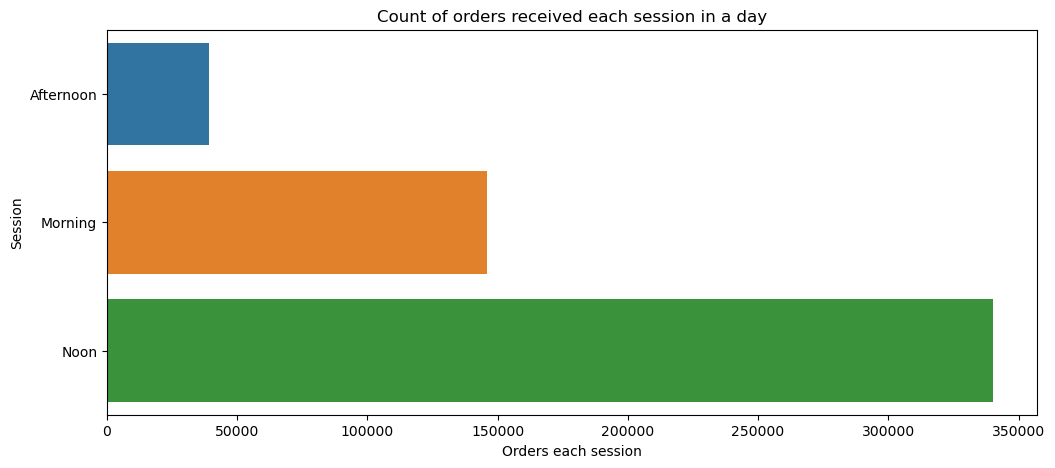

In [128]:
plt.figure(figsize=(12,5))
sns.barplot(data = session_of_day, x = 'invoice_num', y = 'session')
plt.ylabel('Session')
plt.xlabel('Orders each session')
plt.title('Count of orders received each session')
plt.show()

My hypothesis was denied. We can notice that are most busiest hours starts from 11 am and continue till 16 pm.
The peak comes at hour 12 pm and hour 15 pm.
My thought was that people are coming home from work and would focus on their free time at purchasis but our most busiet session is at Noon with almost 350k orders, after it comes the Morning session with around 150k and last comes after the Afternoon with less then 50k orders.

## Summery and Conclusions:

In my project I was supposed to do a product range analysis on the data given me from an online purchase store. I had to:

### 1. Prepare the data :

- Changed the anmes of the columns to remove the capital letters for easier work.
- Dealt with missing values that I had in the "description" column since it wasnt much data to remove(2%). Also, there were missing values in the "id" column (around 25%) but I decided to leave them because they didnt apply any damage to my data.
- Dound and removed duplicates (less then 1% of the data).
- Changed the data type of the 'date' column to datetime so I can work it afterwords more easily.
- Decreased the size of the data in 30mb.
- I Noticed that we have negative values so I decided to run a further analysis on it and found out that they were cancellations. I created 2 seperated datas, for cancellations only and for the rest of the data(called it "filtered"). Also, we have found out that the items that were the most bought were the returned in a couple of minutes. Propably bought by mistake and refunded afterwords.
- Checked for outliers and saw that we have alot of outliers and our products rank from one quantity up to 81k in quantity.

### 2. EDA:

- I created a 'month' column to to find out how much revenue did with gather each month.
- I have grouped the data and found out that the most profitable month in sales was the last month of the year, month 12(December) with over 1.6M in sales.
- On the other hand, we found out that in quantity, most items were sold a month before on November(month 11). Mostly it was gathered in thos 2 months because of the holidays and customers were preparing for christmaxx and buying presents.
- We found out our top 10 buying customers with the leader in the column, id 14096 with around 33k.
- Also, we found out our top selling products, it was: Paper Craft, Little Birdie with almost 81k in quantity and after him comes the Medium Ceramic Top Storage Jar product with 78k in quantity. The problem is that those items were returned afterwards.

### 3. Testing Hypothesis:
Two hypothesis had been run in my project:

#### First Hypothesis:
Is there a time in the year that we have more profitability?

My hypothesis is - That during the end of the year, on month 12(December) we would have the most profitability.

My hypothesis was denied. We can notice that the most profitable month for us was month 11(November) with over 1.6M in sales. After it comes month 12(December) and month 10(October) with almost the same revenue, around 1.2M. I guess the reason is that people were preparing for christmass and buying gifts but they now that delivery takes time so decided to buy a month before the holidays. But when we check the average buy per month, we can notice that month 12 is slightly with an adventage over the other months. ALso, quantity of orders is leading by far on month 11, November, with a big advantage over the month 12(December).

#### Second hypothesis:
Is there a time in the day that people consider purchasing ?

My hypothesis is - People consider buying in the afternoon after they come from work.

My hypothesis was denied. We can notice that are most busiest hours starts from 11 am and continue till 16 pm. The peak comes at hour 12 pm and hour 15 pm. My thought was that people are coming home from work and would focus on their free time at purchasis but our most busiet session is at Noon with almost 350k orders, after it comes the Morning session with around 150k and last comes after the Afternoon with less then 50k orders.

Presentation : https://drive.google.com/open?id=1-4c9mDrPqLmDSnmtUycXNixli1xKPj-z&usp=drive_fs